In [1]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import re
import numpy as np
import pandas as pd

import SequenceDataORM_updt as sqd
import circularspacingtests as cst

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
engine = create_engine('sqlite:///NS001_evolved_mutations_copy3.db', echo=False) # our database connection
session = sessionmaker(bind=engine)() # the session object is how we make queries through sqlalchemy

In [3]:
all_mutations = session.query(sqd.SNP_Mutation).all()
intergenic_mutations = [mut for mut in all_mutations if mut.intergenic_left is not None]
all_mut_but_suf = [mut for mut in all_mutations if 'suf' not in mut.gene]

(array([2.32000e+02, 5.26900e+03, 5.01090e+04, 2.01212e+05, 3.53589e+05,
        2.76508e+05, 9.69510e+04, 1.50110e+04, 1.07300e+03, 4.60000e+01]),
 array([120.22450435, 122.8080287 , 125.39155304, 127.97507739,
        130.55860174, 133.14212609, 135.72565043, 138.30917478,
        140.89269913, 143.47622348, 146.05974783]),
 <a list of 10 Patch objects>)

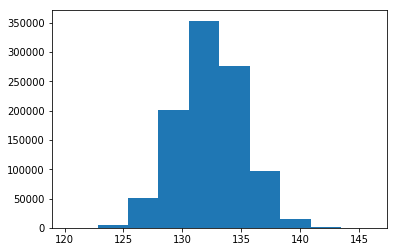

In [4]:
b_sample = 1000
l_sample = 100
chr_l = 4600000

uniform_rao_big = []
for i in range(10**6):
    data = np.random.randint(1, chr_l, b_sample)
    uniform_rao_big.append(cst.rao_spacing(data, chr_l))
    
plt.hist(uniform_rao_big)

(array([3.00000e+00, 5.75000e+02, 1.73420e+04, 1.47761e+05, 3.84498e+05,
        3.35687e+05, 1.02358e+05, 1.12550e+04, 5.14000e+02, 7.00000e+00]),
 array([ 85.11542609,  94.65055826, 104.18569043, 113.72082261,
        123.25595478, 132.79108696, 142.32621913, 151.8613513 ,
        161.39648348, 170.93161565, 180.46674783]),
 <a list of 10 Patch objects>)

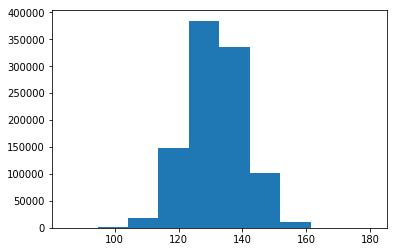

In [5]:
uniform_rao_lit = []
for i in range(10**6):
    data = np.random.randint(1, chr_l, l_sample)
    uniform_rao_lit.append(cst.rao_spacing(data, chr_l))
    
plt.hist(uniform_rao_lit)

In [6]:
all_mut_rs = cst.rao_spacing(np.array([mut.chr_position for mut in all_mutations]), chr_l)
print(all_mut_rs)
print(np.sum(np.array(uniform_rao_big)>all_mut_rs)/10**6)

143.89580053825813
2.2e-05


In [7]:
int_mut_rs = cst.rao_spacing(np.array([mut.chr_position for mut in intergenic_mutations]), chr_l)
print(int_mut_rs)
print(np.sum(np.array(uniform_rao_lit)>int_mut_rs)/10**6)

155.92417070938217
0.003402


In [8]:
all_but_suf_mut_rs = cst.rao_spacing(np.array([mut.chr_position for mut in all_mut_but_suf]), chr_l)
print(all_but_suf_mut_rs)
print(np.sum(np.array(uniform_rao_big)>all_but_suf_mut_rs)/10**6)

142.20641874941057
0.000213
